# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [66]:
import pandas as pd
import matplotlib as plt
import seaborn as sbn
df_sinasc = pd.read_csv('sinasc_ro.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [75]:
df_filtrado = df_sinasc[['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO','SEXO','PESO','RACACOR','GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']]

df_filtrado.loc[df_filtrado['APGAR5']<=3,'CLASS_APGAR'] = 'asfixia grave'
df_filtrado.loc[(df_filtrado['APGAR5']>=4) & (df_filtrado['APGAR5']<=5) ,'CLASS_APGAR'] = 'asfixia moderada'
df_filtrado.loc[(df_filtrado['APGAR5']>=6) & (df_filtrado['APGAR5']<=7) ,'CLASS_APGAR'] = 'asfixia leve'
df_filtrado.loc[df_filtrado['APGAR5']>=8,'CLASS_APGAR'] = 'normal'
df_filtrado['CLASS_APGAR'].value_counts()


C:\Users\andre\AppData\Local\Temp\ipykernel_10104\1208733681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.loc[df_filtrado['APGAR5']<=3,'CLASS_APGAR'] = 'asfixia grave'


normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: CLASS_APGAR, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

C:\Users\andre\AppData\Local\Temp\ipykernel_10104\2671978388.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sbn.catplot(x="GESTACAO", y="APGAR5", hue="SEXO", data=df_filtrado, kind="bar", ci=None)


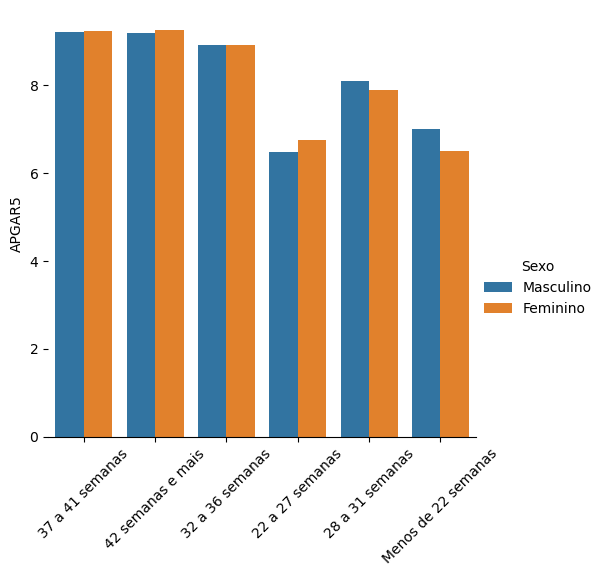

In [68]:
g = sbn.catplot(x="GESTACAO", y="APGAR5", hue="SEXO", data=df_filtrado, kind="bar", ci=None)
g.despine(left=True)
g.set_axis_labels("", "APGAR5")
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=45)
g.legend.set_title("Sexo")


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [69]:
df_cruzado = pd.crosstab(df_filtrado['GESTACAO'],df_filtrado['APGAR5'])
df_cruzado

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [70]:
df_cruzado_pct_lin = df_cruzado.div(df_cruzado.sum(axis = 1), axis = 0)
df_cruzado_pct_lin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

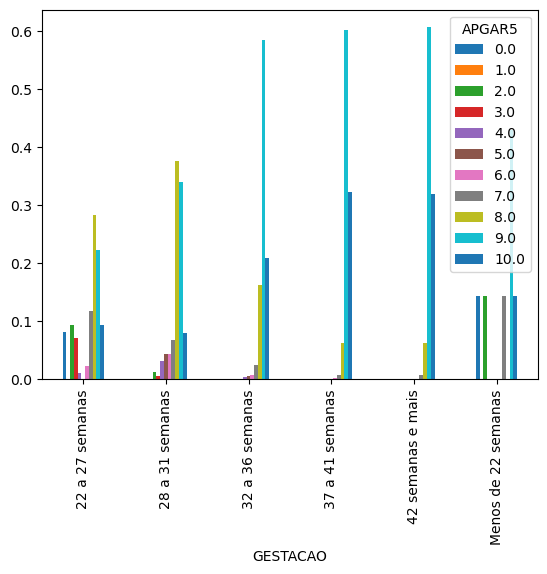

In [71]:
df_cruzado_pct_lin.plot.bar()
#O conjunto de dados corrobora com a afirmação dos médicos pois quanto menor o tempo de gestação menor é o APGAR5

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

C:\Users\andre\AppData\Local\Temp\ipykernel_10104\3216462888.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sbn.catplot(x="APGAR5", y="PESO", hue="RACACOR", data=df_filtrado, kind="bar", ci=None)


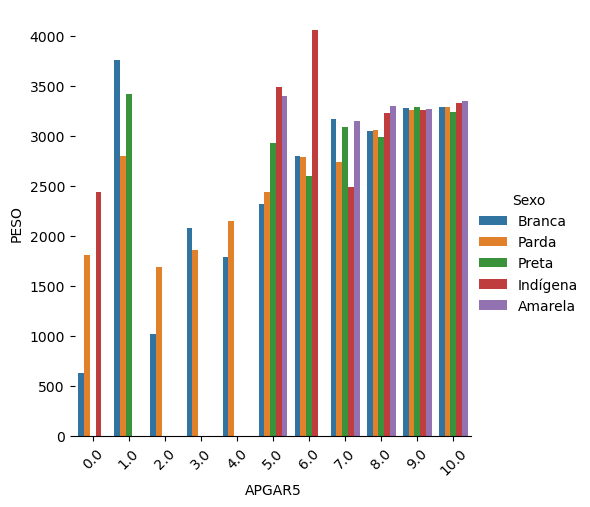

In [81]:
g = sbn.catplot(x="APGAR5", y="PESO", hue="RACACOR", data=df_filtrado, kind="bar", ci=None)
g.despine(left=True)
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=45)
g.legend.set_title("Sexo")